# 4.  Project: Eigenfaces from the LFW (Labeled Faces in the Wild) Dataset

### Library

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


## Instructions:

## Context:

Eigenfaces are a popular application of Principal Component Analysis (PCA) in computer vision. They are used for face recognition by finding the principal components (eigenvectors) of the covariance matrix of a set of facial images. These principal components represent the "eigenfaces" that can be combined to approximate any face in the dataset.

## Task:

Using the LFW (Labeled Faces in the Wild) dataset, build and visualize eigenfaces that account for 80% of the variability in the dataset. The LFW dataset is a well-known dataset containing thousands of labeled facial images, available for academic research.

### 1. Download the LFW Dataset:

+ The dataset can be accessed and downloaded using the *lfw* module from the *sklearn* library in Python or by manually downloading it from the LFW website.
+ In this case, we'll use the lfw module from Python's sklearn library.

In [11]:
# retrieve data and resize to account for memory
lfw_people=fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [16]:
# Get the data for the images
imgs= lfw_people.images
labels=lfw_people.target

### 2. Preprocess the Images:

+ Convert the images to grayscale and resize them to a smaller size (e.g., 64x64) to reduce computational + complexity.
+ Flatten each image into a vector.

In [20]:
# Preprocess the images
def preprocess_img(img):
    # Convert to grayscale 
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if img.ndim == 3 else img
    
    # Resize image to 64x64
    resized_img = cv2.resize(gray_img, (64, 64))
    
    # Flatten the image to a vector
    flattened_img = resized_img.flatten()
    
    return flattened_img

# Preprocess all images
preprocessed_imgs = np.array([preprocess_img(img) for img in imgs])

# Normalize the pixel values (optional)
scaler = StandardScaler()
preprocessed_imgs = scaler.fit_transform(preprocessed_imgs)

# check the shape after preprocessing
print(f"Shape of preprocessed images: {preprocessed_imgs.shape}")  # Should be (num_images, 64*64)



Shape of preprocessed images: (1288, 4096)


Image cout is 1288
Size is 64x64=4096

### 3. Apply PCA:

+ Compute the PCA on the flattened images.
+ Determine the number of principal components required to account for 80% of the variability.

In [23]:
# initialize PCA
pca = PCA()
pca.fit(preprocessed_imgs)

PCA()

In [26]:
#calc cumulative variance
cumulative_var = np.cumsum( pca.explained_variance_ratio_)
# Find # components for 80% of variance
components_80= np.argmax(cumulative_var >= 0.80)+1
print(f"Number of principal components required to account for 80% of the variability is: {components_80}")

Number of principal components required to account for 80% of the variability is: 26


### 4. Visualize Eigenfaces:

+ Visualize the first few eigenfaces (principal components) and discuss their significance.
+ Reconstruct some images using the computed eigenfaces and compare them with the original images.

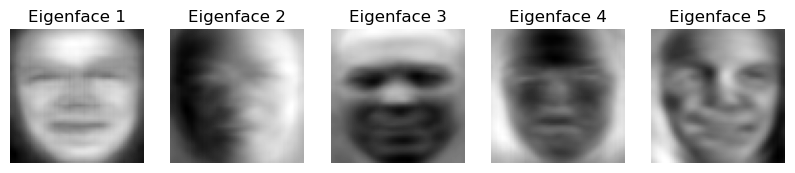

In [28]:
# Step 1: Get the first few eigenfaces (principal components)
eigenfaces = pca.components_.reshape((-1, 64, 64))  # Reshape the components to (64, 64)

# Step 2: Visualize the first few eigenfaces
def plot_eigenfaces(eigenfaces, n_components=5):
    plt.figure(figsize=(10, 5))
    for i in range(n_components):
        plt.subplot(1, n_components, i + 1)
        plt.imshow(eigenfaces[i], cmap='gray')
        plt.title(f'Eigenface {i + 1}')
        plt.axis('off')
    plt.show()

# Visualize the first 5 eigenfaces
plot_eigenfaces(eigenfaces, n_components=5)


**Provide knitted R or Python code.  ONLY Knitted PDF files are acceptable for submission in this course.  All text, graphics, proofs, and content must be in a professional document that addresses all requirements.**